# Entrainement DQN pour Space Invaders IA

In [ ]:
import dqn
from game_environnement.space_invaders_game.Code.Main import Game
from game_environnement.space_invaders_env import SpaceInvadersEnv
from dqn.dqn_agent import train_dqn
from dqn.dqn_agent import DQNAgent

import pygame
from random import randint
import numpy as np
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.13.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
pygame.init()

pygame.display.set_mode((100, 100))  

game = Game(600, 600, screen=None)
env = SpaceInvadersEnv(game)

In [4]:
print("=== DÉBUT DE L'ENTRAINEMENT DQN ===")
rewards = train_dqn(env, episodes=50)
print("=== FIN DE L'ENTRAINEMENT DQN ===")

=== DÉBUT DE L'ENTRAINEMENT DQN ===
Episode 1/50 - Reward: 7.00 - Epsilon: 0.995
Episode 2/50 - Reward: -19.53 - Epsilon: 0.990
Episode 3/50 - Reward: -15.13 - Epsilon: 0.985
Episode 4/50 - Reward: 21.00 - Epsilon: 0.980
Episode 5/50 - Reward: 16.00 - Epsilon: 0.975
Episode 6/50 - Reward: -6.86 - Epsilon: 0.970
Episode 7/50 - Reward: -13.95 - Epsilon: 0.966
Episode 8/50 - Reward: -21.29 - Epsilon: 0.961
Episode 9/50 - Reward: -18.98 - Epsilon: 0.956
Episode 10/50 - Reward: 16.00 - Epsilon: 0.951
Episode 11/50 - Reward: -12.12 - Epsilon: 0.946
Episode 12/50 - Reward: -14.29 - Epsilon: 0.942
Episode 13/50 - Reward: -6.79 - Epsilon: 0.937
Episode 14/50 - Reward: -23.04 - Epsilon: 0.932
Episode 15/50 - Reward: -15.69 - Epsilon: 0.928
Episode 16/50 - Reward: -12.77 - Epsilon: 0.923
Episode 17/50 - Reward: -13.14 - Epsilon: 0.918
Episode 18/50 - Reward: -23.47 - Epsilon: 0.914
Episode 19/50 - Reward: 9.00 - Epsilon: 0.909
Episode 20/50 - Reward: 17.00 - Epsilon: 0.905
Episode 21/50 - Reward:

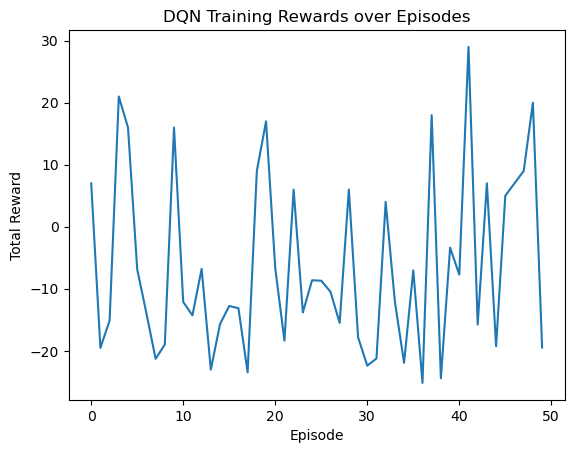

In [5]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('DQN Training Rewards over Episodes')
plt.show()

In [ ]:
import pygame
import torch
import numpy as np
from game_environnement.space_invaders_game.Code.Main import Game
from game_environnement.space_invaders_env import SpaceInvadersEnv
from dqn.dqn_agent import DQNAgent

# 1. Initialisation Graphique
pygame.init()
screen_width = 600
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Test de l'Agent DQN")
clock = pygame.time.Clock()

# 2. Création de l'environnement AVEC l'écran
# Note: On passe 'screen' ici pour que le jeu puisse dessiner
game = Game(screen_width, screen_height, screen=screen)
env = SpaceInvadersEnv(game)

# 3. Création de l'agent
# ATTENTION : state_size doit être le même que celui de l'entraînement 
# (4 si vous avez appliqué ma correction précédente, sinon 6)
state_size = 4  
action_size = 4
agent = DQNAgent(state_size, action_size)

# 4. Chargement du cerveau (Poids)
model_path = "space_invaders_model.pth"
try:
    agent.q_network.load_state_dict(torch.load(model_path))
    agent.q_network.eval() # Mode évaluation (fige les couches comme Dropout/Batchnorm)
    print("Modèle chargé avec succès !")
except FileNotFoundError:
    print("Erreur : Le fichier modèle n'existe pas. Lancez l'entraînement d'abord.")
    exit()

# 5. Configuration pour le test
agent.epsilon = 0.0 # Politique gloutonne (pure exploitation)
state = env.reset()
done = False
total_reward = 0

print("=== DÉBUT DU TEST VISUEL ===")

running = True
while running and not done:
    # Gestion de la fermeture de la fenêtre
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # --- IA JOU ---
    action = agent.act(state)
    state, reward, done = env.step(action)
    total_reward += reward

    # --- DESSIN (RENDU) ---
    screen.fill((30, 30, 30)) # Effacer l'écran (fond noir/gris)
    
    # On appelle les fonctions de dessin du jeu original
    # Note: Votre classe Game a besoin d'une méthode pour tout dessiner
    # Si Game.run() fait les updates ET le dessin, utilisez-le, 
    # mais attention car Game.run() appelle aussi la logique de jeu.
    
    # Le mieux est d'appeler manuellement les .draw() sur les groupes de sprites
    game.player.sprite.lasers.draw(screen)
    game.player.draw(screen)
    game.blocks.draw(screen)
    game.aliens.draw(screen)
    game.alien_lasers.draw(screen)
    # game.display_lives() # Si vous voulez l'affichage des vies
    # game.display_score() # Si vous voulez l'affichage du score

    pygame.display.flip() # Mettre à jour l'écran
    
    # --- RALENTIR ---
    # 60 FPS pour que ce soit visible pour un humain
    clock.tick(60) 

print(f"Partie terminée ! Score total (Reward) : {total_reward}")
pygame.quit()

Erreur : Le fichier modèle n'existe pas. Lancez l'entraînement d'abord.
=== DÉBUT DU TEST VISUEL ===


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x128)

: 